In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [24]:
df=pd.read_csv(r"C:Desktop/data analytics/diabetes.csv")

In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

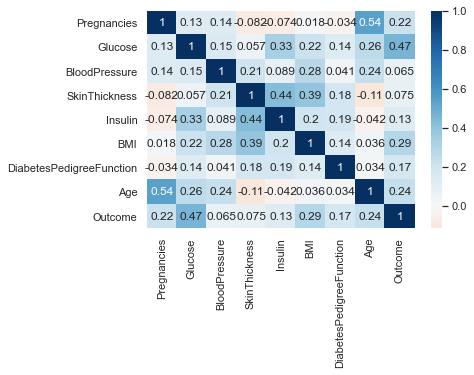

In [27]:
corr = df.corr()
sns.heatmap(corr,cmap='RdBu',center=0,annot=True)

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

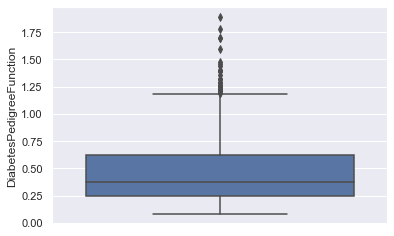

In [109]:
sns.boxplot(y=df['DiabetesPedigreeFunction'])

In [105]:
df[df['DiabetesPedigreeFunction']>2.0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
228,4,197,70,39,744,36.7,2.329,31,0
370,3,173,82,48,465,38.4,2.137,25,1
445,0,180,78,63,14,59.4,2.420,25,1


In [106]:
df.drop(df[df.DiabetesPedigreeFunction>2.0].index,axis=0,inplace=True)

In [107]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [108]:
df.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
710,763,10,101,76,48,180,32.9,0.171,63,0
711,764,2,122,70,27,0,36.8,0.340,27,0
712,765,5,121,72,23,112,26.2,0.245,30,0
713,766,1,126,60,0,0,30.1,0.349,47,1


In [140]:
df.to_csv('diab.csv',index=False)

In [328]:
df=pd.read_csv(r"C:diab.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


In [329]:
df.columns[0]


'Pregnancies'

In [330]:
y = df['Outcome'] # genre variable.
X = df.loc[:, df.columns != 'Outcome'] #select all columns but not the outcome

In [331]:
y

0      1
1      0
2      1
3      0
4      0
      ..
710    0
711    0
712    0
713    1
714    0
Name: Outcome, Length: 715, dtype: int64

In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.2, random_state=2021)

In [333]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [334]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0,max_iter=1000)
score(lg, "Logistic Regression")
print("Train Accuracy:",lg.score(X_train, y_train))
print("Test Accuracy:",lg.score(X_test, y_test))

Accuracy for Logistic Regression : 0.8042 

Train Accuracy: 0.7762237762237763
Test Accuracy: 0.8041958041958042


In [335]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
score(abc, "Abc")
print("Train Accuracy:",abc.score(X_train, y_train))
print("Test Accuracy:",abc.score(X_test, y_test))

Accuracy for Abc : 0.72028 

Train Accuracy: 0.8706293706293706
Test Accuracy: 0.7202797202797203


In [336]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=0)
score(rf, "rf")
print("Train Accuracy:",rf.score(X_train, y_train))
print("Test Accuracy:",rf.score(X_test, y_test))

Accuracy for rf : 0.78322 

Train Accuracy: 0.8234265734265734
Test Accuracy: 0.7832167832167832


In [337]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
score(nb, "nb")
print("Train Accuracy:",nb.score(X_train, y_train))
print("Test Accuracy:",nb.score(X_test, y_test))

Accuracy for nb : 0.82517 

Train Accuracy: 0.7465034965034965
Test Accuracy: 0.8251748251748252


In [338]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
score(dt, "dt")
print("Train Accuracy:",dt.score(X_train, y_train))
print("Test Accuracy:",dt.score(X_test, y_test))

Accuracy for dt : 0.72727 

Train Accuracy: 0.8304195804195804
Test Accuracy: 0.7272727272727273


In [339]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=1000,learning_rate=0.001)
score(xgb, "xgb")
print("Train Accuracy:",xgb.score(X_train, y_train))
print("Test Accuracy:",xgb.score(X_test, y_test))

[00:19:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91731\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for xgb : 0.76224 

Train Accuracy: 0.8618881118881119
Test Accuracy: 0.7622377622377622


In [340]:
from sklearn import svm
svc = svm.SVC(C=25,gamma='scale')
score(svc, "svm")
print("Train Accuracy:",svc.score(X_train, y_train))
print("Test Accuracy:",svc.score(X_test, y_test))

Accuracy for svm : 0.73427 

Train Accuracy: 0.784965034965035
Test Accuracy: 0.7342657342657343


In [341]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, X_train, y_train, cv=6)
print(scores.mean(), scores.std())
print("Test Accuracy:",svc.score(X_test, y_test))

0.7482090643274854 0.017714998911471404
Test Accuracy: 0.7342657342657343


In [342]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lg, X_train, y_train, cv=6)
print(scores.mean(), scores.std())
print("Test Accuracy:",lg.score(X_test, y_test))

0.7743238304093567 0.0412639440802119
Test Accuracy: 0.8041958041958042


In [343]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(abc, X_train, y_train, cv=6)
print(scores.mean(), scores.std())
print("Test Accuracy:",abc.score(X_test, y_test))

0.7516812865497077 0.03344158435066892
Test Accuracy: 0.7202797202797203


In [344]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=6)
print(scores.mean(), scores.std())
print("Test Accuracy:",rf.score(X_test, y_test))

0.7603618421052633 0.028344086157542414
Test Accuracy: 0.7832167832167832


In [345]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, X_train, y_train, cv=6)
print(scores.mean(), scores.std())
print("Test Accuracy:",nb.score(X_test, y_test))

0.7342653508771929 0.0188496324804244
Test Accuracy: 0.8251748251748252


In [346]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X_train, y_train, cv=6)
print(scores.mean(), scores.std())
print("Test Accuracy:",dt.score(X_test, y_test))

0.7673611111111112 0.04129846870535353
Test Accuracy: 0.7272727272727273


In [347]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X_train, y_train, cv=6)
print(scores.mean(), scores.std())
print("Test Accuracy:",xgb.score(X_test, y_test))

[00:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91731\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91731\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91731\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91731\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91731\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91731\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7482090643274854 0.02060641915843593
Test Accuracy: 0.7622377622377622
